# FreeSurfer: mri_vol2surf 
## Sampling fMRI signal across cortical depths

**mri_vol2surf** is a FreeSurfer based command that enables one to assign fMRI signal value to each surface vertex.
    
#####
**Author:** Fernanda L. Ribeiro

**Date:** 22 June 2025

### Citation and Resources:

#### Tools included in this workflow
__FreeSurfer__
- Fischl B. (2012). FreeSurfer. NeuroImage, 62(2), 774–781. [https://doi.org/10.1016/j.neuroimage.2012.01.021](https://doi.org/10.1016/j.neuroimage.2012.01.021)

#### Dataset
__Open source Data from OpenNeuro:__
- Kelly Chang and Ione Fine and Geoffrey M. Boynton (2024). [CHN Retinotopic Mapping Dataset OpenNeuro](https://openneuro.org/datasets/ds004698/versions/2.0.0) doi: doi:10.18112/openneuro.ds004698.v2.0.0

#### Publications
__Original manuscript:__ 
- Chang, K., Fine, I., & Boynton, G. M. (2025). Improving the reliability and accuracy of population receptive field measures using a logarithmically warped stimulus. Journal of Vision, 25(1), 5. [https://doi.org/10.1167/jov.25.1.5](https://doi.org/10.1167/jov.25.1.5)

## Goal of this example notebook

In this example notebook we demonstrate how one can assign fMRI signal values to each cortical surface vertex across cortical depths. This can be relevant, for example, to assess how topographic maps may change across cortical depths and determine the potential impact of vasculature in the [topological arrangement of such maps](https://www.sciencedirect.com/science/article/abs/pii/S1053811910007111?via%3Dihub). 

Although we do not attempt to reconstruct retinotopic maps in this tutorial, here we show how to perform such procedure using retinotopic mapping data. 

## Install Python packages

In [1]:
%%capture
!pip install numpy nilearn nibabel

## Import relevant libraries

In [2]:
import numpy as np
import module
import os
import nibabel as nib

## Load FreeSurfer

In [3]:
await module.load('freesurfer/7.3.2')
await module.list()

['freesurfer/7.3.2']

## Download data from the OpenNeuro

In [4]:
!datalad install https://github.com/OpenNeuroDatasets/ds004698.git # install NYU retinotopy dataset
os.chdir('ds004698') # change directories
subject='sub-01'
cmd1=f"""datalad get derivatives/freesurfer/{subject}/*""" # download all freesurfer files from subject
cmd2=f"""datalad get derivatives/fmriprep/sub-01/ses-01/func/sub-01_ses-01_task-fixedbar_run-1_*""" #download all preprocessed functional volumes from subject
os.system(cmd1)
os.system(cmd2)

Cloning:   0%|                             | 0.00/2.00 [00:00<?, ? candidates/s]
Enumerating: 0.00 Objects [00:00, ? Objects/s]
                                              
Counting:   0%|                              | 0.00/99.6k [00:00<?, ? Objects/s]
                                                                                
Compressing:   0%|                           | 0.00/68.8k [00:00<?, ? Objects/s]
Compressing:  60%|███████████▍       | 41.3k/68.8k [00:00<00:00, 343k Objects/s]
                                                                                
Receiving:   0%|                             | 0.00/99.6k [00:00<?, ? Objects/s]
Receiving:  19%|███▉                 | 18.9k/99.6k [00:00<00:00, 188k Objects/s]
Receiving:  48%|██████████           | 47.8k/99.6k [00:00<00:00, 243k Objects/s]
Receiving:  73%|███████████████▎     | 72.7k/99.6k [00:00<00:00, 225k Objects/s]
Receiving:  96%|████████████████████▏| 95.6k/99.6k [00:00<00:00, 190k Objects/s]
               

0

## Sample fMRI data across layers

In [5]:
if not os.path.exists('../new_data'):
    os.mkdir('../new_data') # create a directory to save the newly sampled fMRI data

Now, we can run [mri_vol2surf](https://surfer.nmr.mgh.harvard.edu/fswiki/mri_vol2surf) to sample fMRI signal values from a volume to each surface vertex. 

In [6]:
depths = np.arange(0,1.1,0.1)
print(f"Functional data will be sample at the following depths: {depths}")

Functional data will be sample at the following depths: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


<div style="background-color: #ABBAEF; padding: 10px; border-radius: 5px;">
    <div style="background-color: #add8e6; padding: 5px; border-radius: 5px; font-weight: bold;">
        <span style="font-size: 15px; color: #add8e6; background-color: white; border-radius: 50%; width: 20px; height: 20px; display: inline-block; text-align: center; line-height: 20px;">
            !
        </span> <span style="color: white;">Note:</span>
    </div>
    <p style="margin: 10px 0;">
        Before assigning fMRI data to each surface vertex make sure that both the anatomical and functional data are aligned.
    </p>
</div>

In [7]:
for depth in depths:
    print(f"""Processing depth: {depth}""")
    cmd = f"""mri_vol2surf --src derivatives/fmriprep/sub-01/ses-01/func/sub-01_ses-01_task-fixedbar_run-1_space-T1w_desc-preproc_bold.nii.gz \
                 --regheader sub-01 \
                 --hemi lh \
                 --surf white \
                 --projfrac {depth} \
                 --sd derivatives/freesurfer \
                 --out ../new_data/sub-01_ses-01_task-fixedbar_run-1_space-T1w_desc-preproc_bold_depth-{depth:.1f}.func.mgh"""
    os.system(cmd)

Processing depth: 0.0
srcvol = derivatives/fmriprep/sub-01/ses-01/func/sub-01_ses-01_task-fixedbar_run-1_space-T1w_desc-preproc_bold.nii.gz
srcreg unspecified
srcregold = 0
srcwarp unspecified
surf = white
hemi = lh
reshape = 0
interp = nearest
float2int = round
GetProjMax = 0
INFO: float2int code = 0
Done loading volume
Computing registration from header.
  Using derivatives/freesurfer/sub-01/mri/orig.mgz as target reference.
-------- original matrix -----------
-1.00000   0.00000  -0.00000   0.12505;
-0.00000  -0.00000   1.00000   2.69328;
 0.00000  -1.00000   0.00000   0.19273;
 0.00000   0.00000   0.00000   1.00000;
-------- original matrix -----------
Reading surface derivatives/freesurfer/sub-01/surf/lh.white
Done reading source surface
Mapping Source Volume onto Source Subject Surface
Projecting 0 0 1
 1 0 0 0
using old
Done mapping volume to surface
Number of source voxels hit = 28255
Writing to ../new_data/sub-01_ses-01_task-fixedbar_run-1_space-T1w_desc-preproc_bold_depth-0.0

Finally, we can convert our data to 'func.gii', so we can perform [population receptive field modeling](https://www.sciencedirect.com/science/article/abs/pii/S1053811907008269?via%3Dihub) using tools like [SamSrf](https://github.com/samsrf/samsrf).

In [8]:
for depth in depths:
    print(f"Processing depth: {depth}")
    cmd = f"""mri_convert ../new_data/sub-01_ses-01_task-fixedbar_run-1_space-T1w_desc-preproc_bold_depth-{depth:.1f}.func.mgh \
                    ../new_data/sub-01_ses-01_task-fixedbar_run-1_space-T1w_desc-preproc_bold_depth-{depth:.1f}.func.gii"""
    os.system(cmd)
    print("Data has been converted!")

Processing depth: 0.0
/opt/freesurfer-7.3.2/bin/mri_convert ../new_data/sub-01_ses-01_task-fixedbar_run-1_space-T1w_desc-preproc_bold_depth-0.0.func.mgh ../new_data/sub-01_ses-01_task-fixedbar_run-1_space-T1w_desc-preproc_bold_depth-0.0.func.gii 
reading from ../new_data/sub-01_ses-01_task-fixedbar_run-1_space-T1w_desc-preproc_bold_depth-0.0.func.mgh...
TR=1200.00, TE=0.00, TI=0.00, flip angle=0.00
i_ras = (1, 0, 0)
j_ras = (0, 1, 0)
k_ras = (0, 0, 1)
writing to ../new_data/sub-01_ses-01_task-fixedbar_run-1_space-T1w_desc-preproc_bold_depth-0.0.func.gii...
Data has been converted!
Processing depth: 0.1
/opt/freesurfer-7.3.2/bin/mri_convert ../new_data/sub-01_ses-01_task-fixedbar_run-1_space-T1w_desc-preproc_bold_depth-0.1.func.mgh ../new_data/sub-01_ses-01_task-fixedbar_run-1_space-T1w_desc-preproc_bold_depth-0.1.func.gii 
reading from ../new_data/sub-01_ses-01_task-fixedbar_run-1_space-T1w_desc-preproc_bold_depth-0.1.func.mgh...
TR=1200.00, TE=0.00, TI=0.00, flip angle=0.00
i_ras = (1

Before moving forward, make sure the newly sampled data has the same shape as previously preprocessed, sampled data.

In [9]:
our_newly_sampled_data = nib.load("../new_data/sub-01_ses-01_task-fixedbar_run-1_space-T1w_desc-preproc_bold_depth-1.0.func.gii").agg_data()
previous_sampled_data = nib.load("derivatives/fmriprep/sub-01/ses-01/func/sub-01_ses-01_task-fixedbar_run-1_hemi-L_space-fsnative_bold.func.gii").agg_data()

assert our_newly_sampled_data.shape == previous_sampled_data.shape, "Sampled data is not correct!"

## Visualize the data

In [10]:
!mris_convert derivatives/freesurfer/sub-01/surf/lh.sphere derivatives/freesurfer/sub-01/surf/lh.sphere.gii

Saving derivatives/freesurfer/sub-01/surf/lh.sphere.gii as a surface


In [11]:
from nilearn import plotting
from ipywidgets import Dropdown, interact
import nibabel as nib
import numpy as np

def plot_data(depth, time_point):
    if depth !='average':
        data = np.array(nib.load("../new_data/sub-01_ses-01_task-fixedbar_run-1_space-T1w_desc-preproc_bold_depth-"
                                 + str(depth) + ".func.gii").agg_data())[:,time_point]
    else:
        data = np.array(nib.load("derivatives/fmriprep/sub-01/ses-01/func/sub-01_ses-01_task-fixedbar_run-1_hemi-L_space-fsnative_bold.func.gii").agg_data())[:,time_point]
    view = plotting.view_surf(
    surf_mesh="derivatives/freesurfer/sub-01/surf/lh.sphere.gii",
    surf_map=np.reshape(data[:], (-1)),
    cmap="Reds", black_bg=False, symmetric_cmap=False,
    threshold=0, vmax=10000, darkness=None)
    return view


We can generate some interactive plots with ipywidgets and nilearn.

In [12]:
depth = Dropdown(options = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 'average'])
time_point = Dropdown(options = [0, 50, 100, 150, 200, 250, 300])

@interact(depth = depth, time_point = time_point)
def plot1(depth, time_point):

    return plot_data(depth, time_point)

interactive(children=(Dropdown(description='depth', options=(0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,…

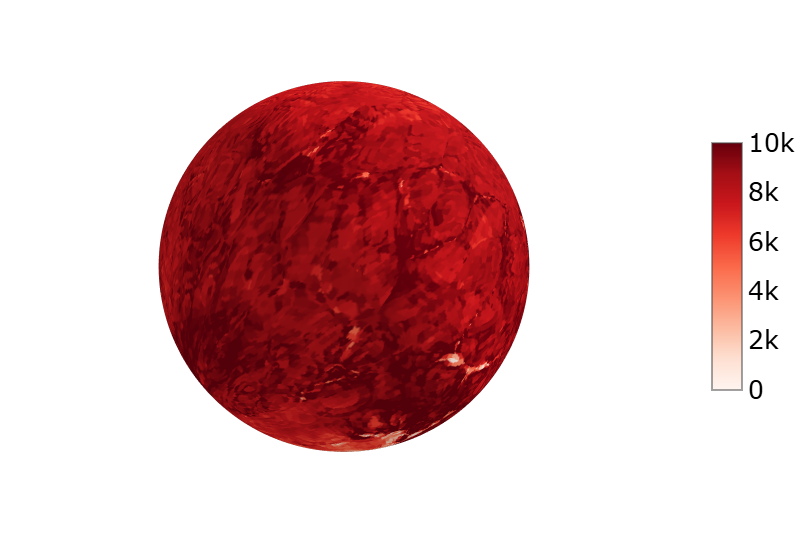

In [2]:
from IPython.display import Image
Image(filename='../../static/examples/functional_imaging/mri_vol2surf/vol_2surf_nilearn.png')

#### Dependencies in Jupyter/Python
- Using the package [watermark](https://github.com/rasbt/watermark) to document system environment and software versions used in this notebook

In [13]:
%load_ext watermark

%watermark
%watermark --iversions

Last updated: 2025-12-04T04:06:29.784777+00:00

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 5.4.0-204-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit

numpy     : 2.2.4
ipywidgets: 8.1.2
nibabel   : 5.3.2
nilearn   : 0.11.1

